In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [53]:
titanic_regression=pd.read_csv("C:/Users/mohamedi/Documents/titanic-passengers.csv",sep=";")
titanic_regression["Survived"]=titanic_regression["Survived"].map( {'No': 0, 'Yes': 1 }).astype(int)

In [54]:
titanic_regression.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [55]:
titanic_regression["Sex"]=titanic_regression["Sex"].map( {'male': 0, 'female': 1 }).astype(int)

In [22]:
titanic_regression.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S


In [11]:
titanic_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 80.2+ KB


In [56]:
titanic_regression['Age']=titanic_regression.fillna(titanic_regression.mean())

In [16]:
titanic_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(6)
memory usage: 80.2+ KB


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
features=['Sex','Age','Pclass','SibSp','Parch']
x=titanic_regression[features]
y=titanic_regression['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression
logis_titanic=LogisticRegression()

In [60]:
logis_titanic.fit(x_train,y_train)

LogisticRegression()

In [61]:
logis_titanic.score(x_test,y_test)

0.7888888888888889

In [62]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
y_pred = logis_titanic.predict(x_test)
confusion_matrix(y_pred,y_test)

array([[46, 13],
       [ 6, 25]], dtype=int64)

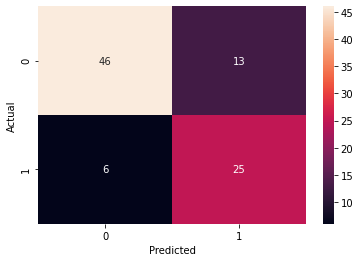

In [63]:
confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [40]:
titanic_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int32(2), int64(4), object(5)
memory usage: 76.7+ KB


In [64]:
fpr,tpr,_=roc_curve(y_test,y_pred)

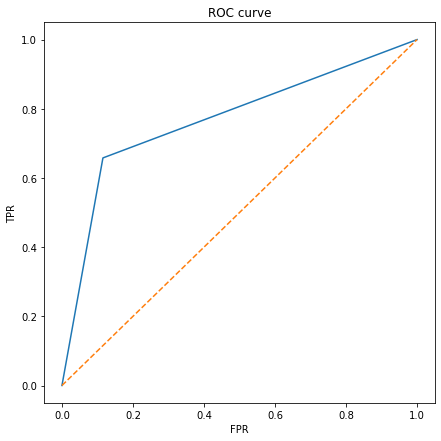

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr,  label='ROC curve')
plt.plot([0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()